## Inheritance

### 1. Definition:
- we can describe inheritance as occurring when a child class (subclass) inherits the state and behaviors of a parent class(superclass).

> Java does not allow multiple inheritance (i.e. one child cannot points to two different parents)

> The hierarchy shows subclass vs. super class relationship. And by default, at the top of every inheritance hierarchy is a class named "Object" which is a calss in the Java standard library.
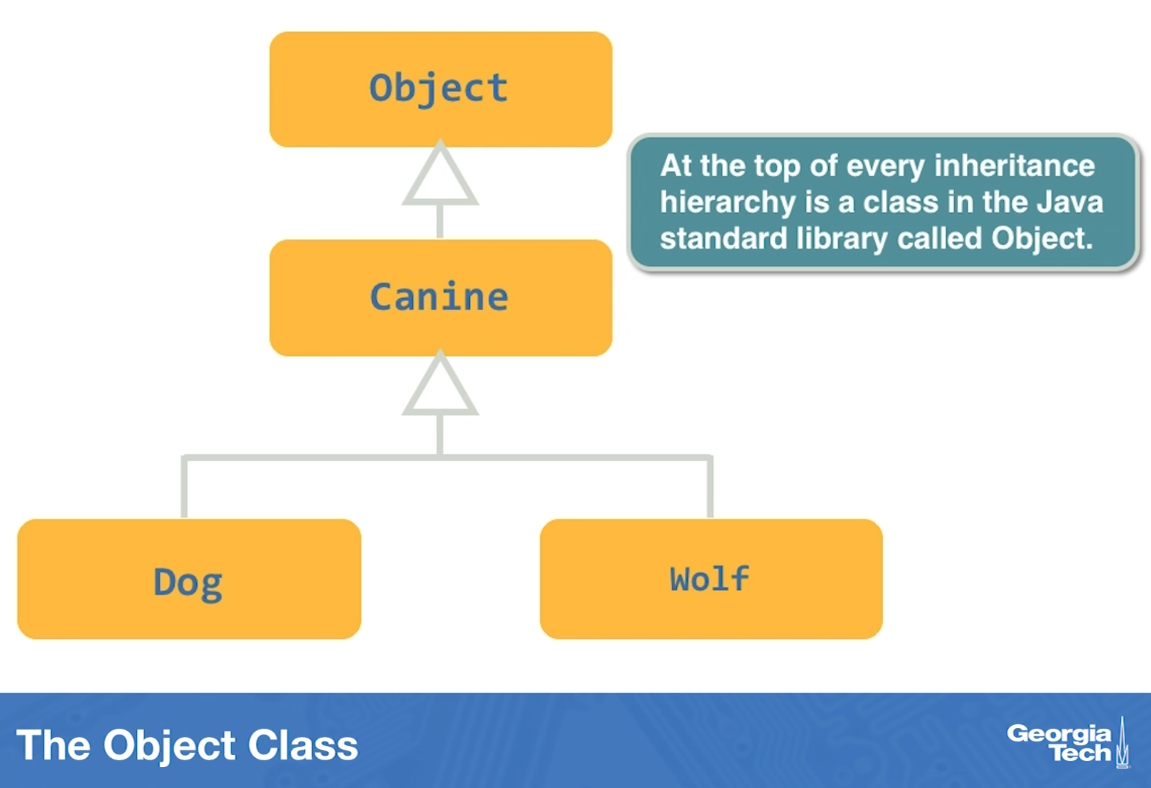

### 2. "Protected" Modifier

- Protected modifier is another type of visibility modifier like Public, Private
- Protected class members can only be accessed by its sub-classes and any other class within that class's package
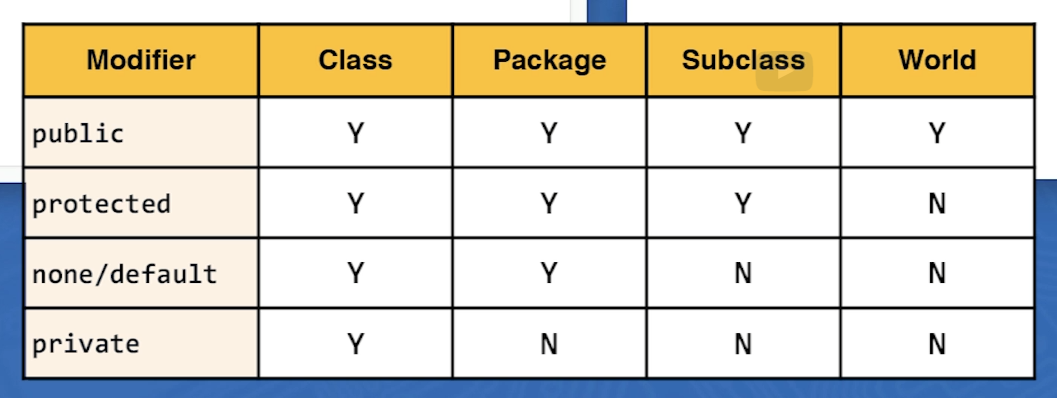

- Please note: inheritance does not happen sideways or horizontally in the hierarchy for protected variables. 
    - So in the example below, assume "Canine" is super class of both "Dog" and "Wolf"
    - Then "size" applies to both dog and wolf subclasses
    - But "name" defined in "dog" does not apply to "wolf", similarly, "rank" defined in "wolf" does not apply to "dog"
    
    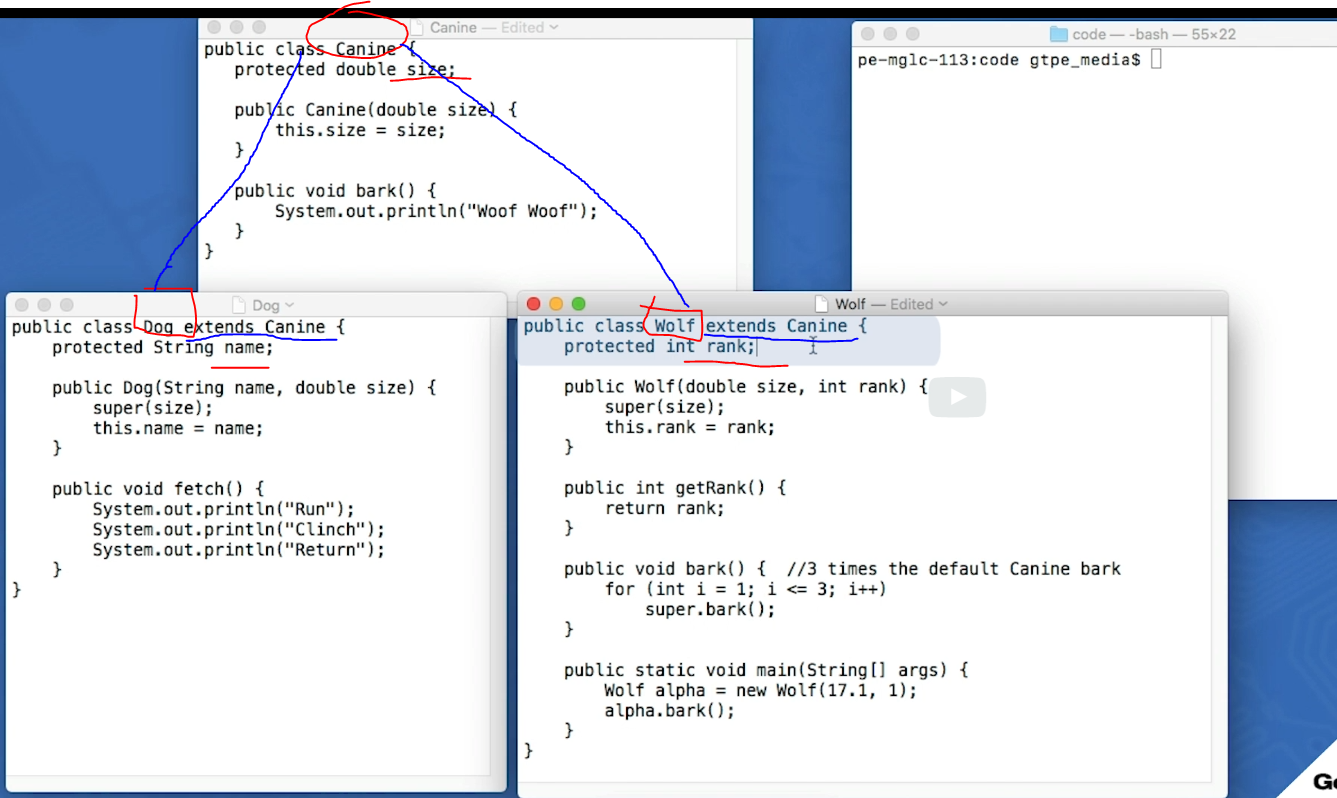

### 3. Declaring subclass

- As indicated above, subclass is declared using "extends" keywords

### 4. Subclass Constructors

- If you don't explicitly invoke a superclass's constructor with a "super" call in a child class' constructor, Java automatically calls the **parameterless** super constructor at the very start of the child's constructor, so you will encounter the compiler error.
- So we need to use "super" in the child constructor to invoke the super class's constructor and initialize the variables from super class.
    - Please note: The variables that were passed into super() method should match the variables that were in the superclass constructor
- super() must be the first line of the child constructor

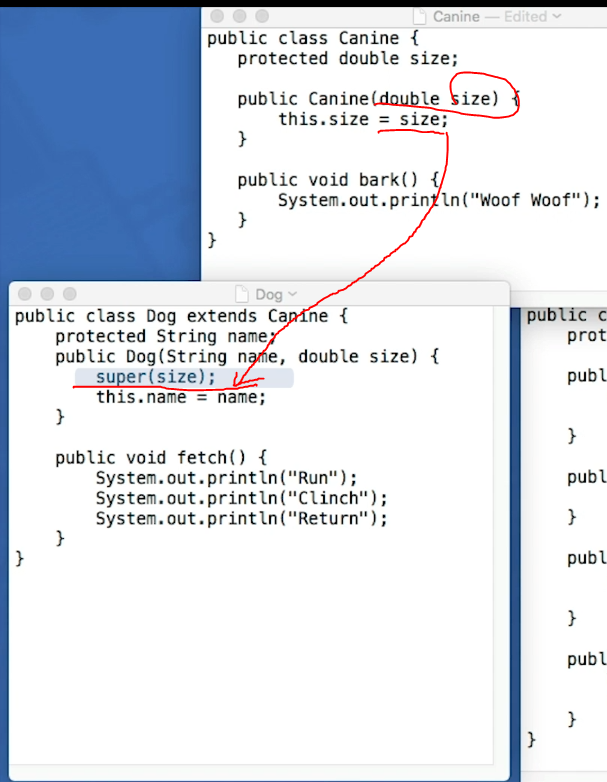



### 5. Method Override (not overload) in subclass

To override a parent's method, you don't need to do anything special beyond writing a method with the **same method signature** in the child.
- Please note: this requires the same method signature, which including the formal parameters as well! So if we change the below example's subclass's method bark() to bark(para1,para2,...), this is not considered as a method override to superclass because they have different method signature.

- Also we need to use super.method_name() to call a method from superclass

- Example below shows a superclass's bark() method in "Canine" and a subclass's bark() method in "Wolf". The method in subclass is method overriding the superclass.

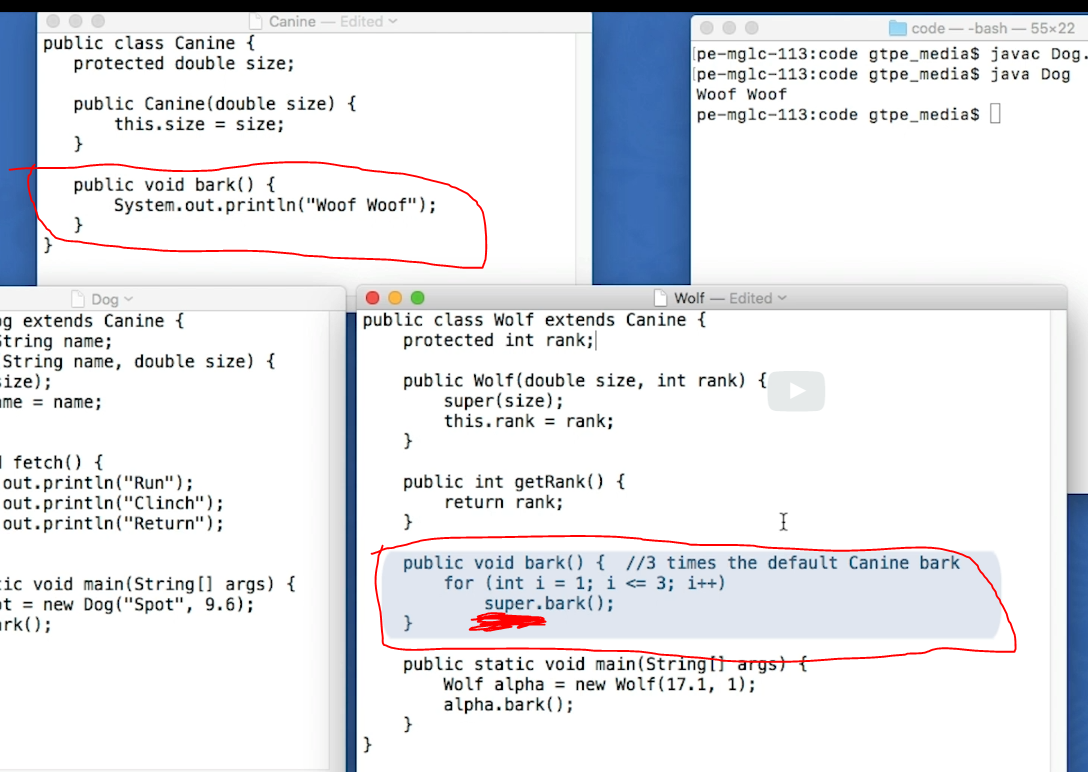

### 6. "final" modifier to prevent method overriding

- Adding "final" to a method header prevents the method from being overriden.
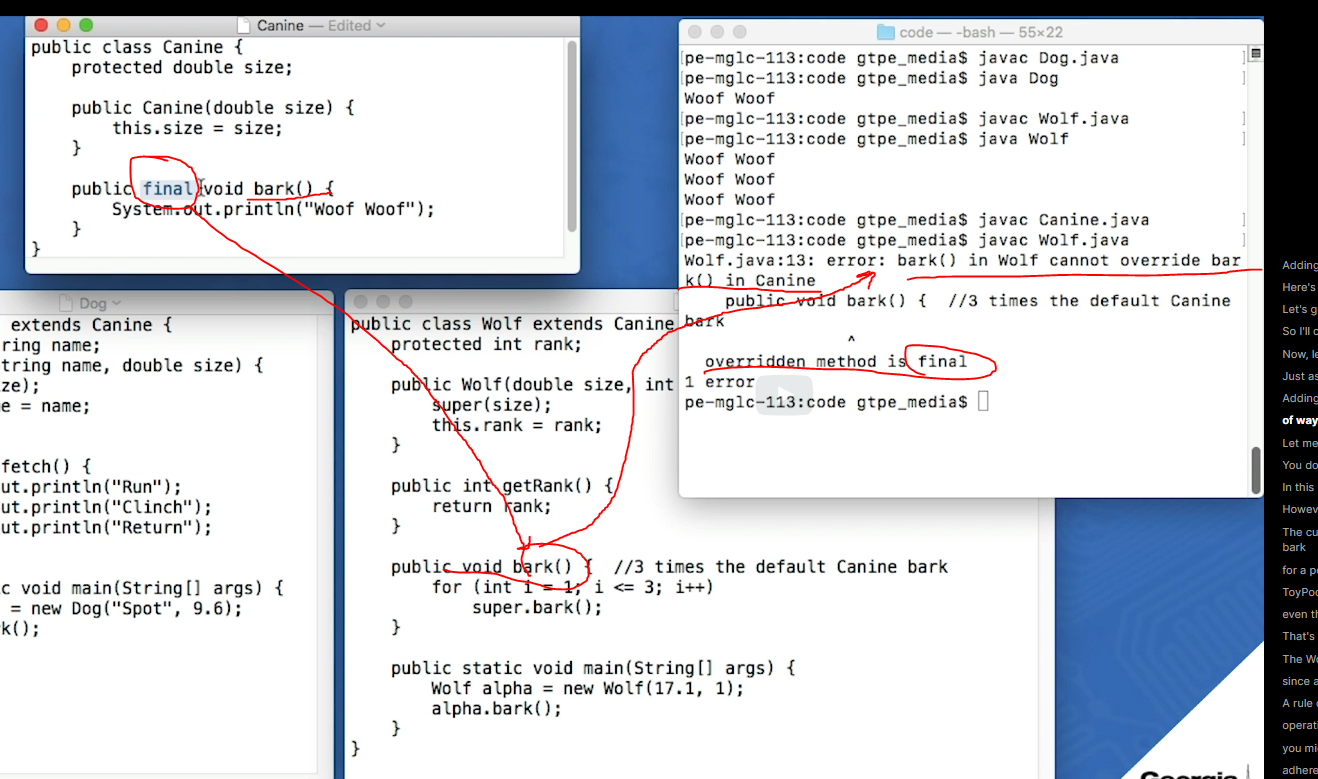

> A rule of thumb is that when you have a method that warrants data sensitive
operations or is highly optimized to do something in a certain way,
you might want to make it final to guarantee that that implementation is
adhered to as the hierarchy gets more diverse and deeper.

### 7. "final" modifier to make final class

- Adding "final" to class header can make a class final; A final class is one that cannot be subclassed
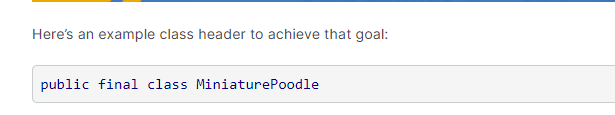

### 8. "Abstract" modifier

- we can assign the **abstract** modifier to methods and classes that are not fully defined.
    
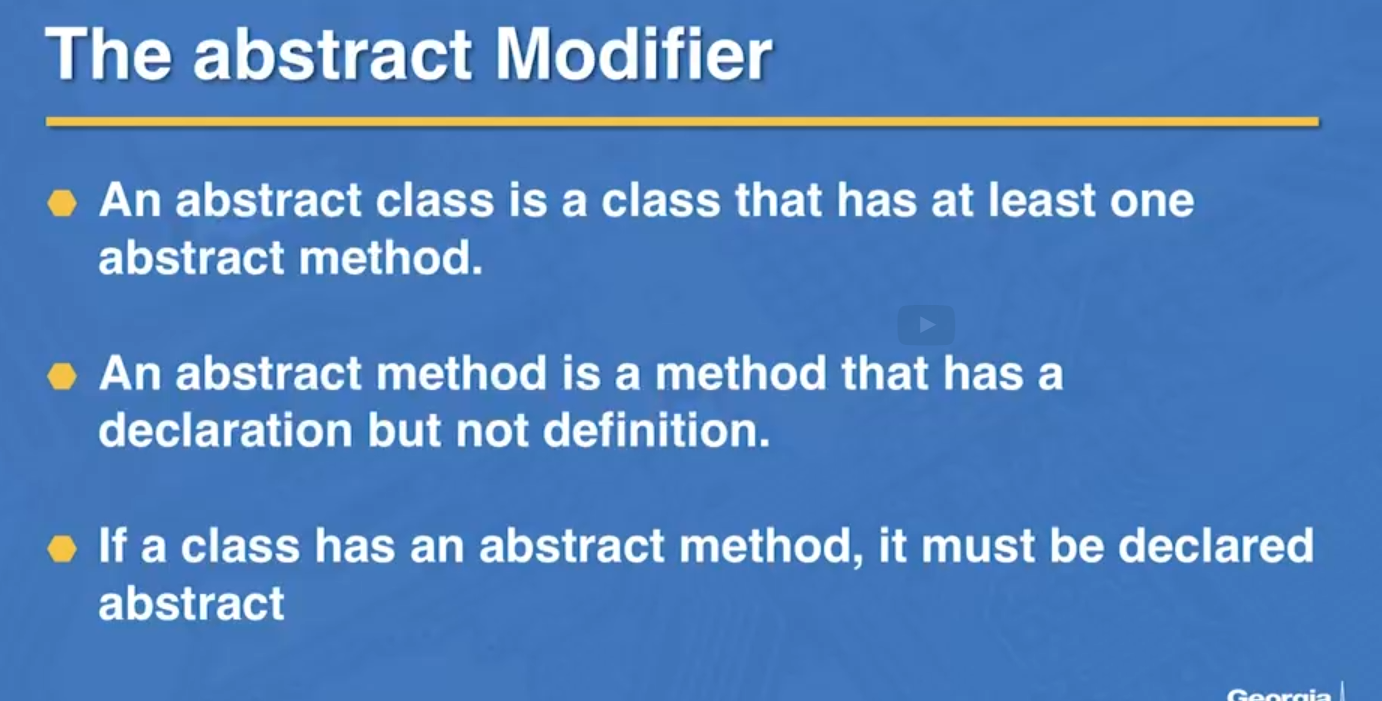


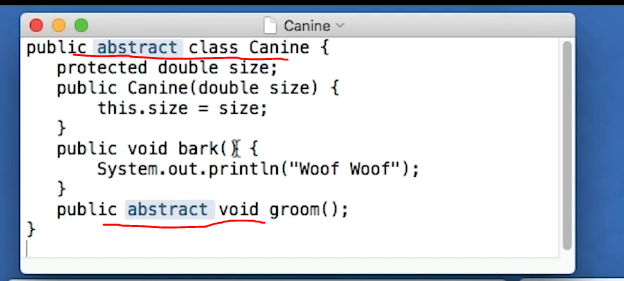

> In contrast, a method that is not abstract method can be named as "concrete" method

- Why do we need abstract method/class?
    - The abstract method can be an alternative way to method overriding. That's because in superclass you can define a generic abstract method, and then later on in each subclass, you can complete that method that suits the needs for each subclass without needing to method overriding.
    
    - The abstract class should be generic concepts or things
    
> Note: as indicated in the definition above, in order for an abstract method to work, you need to declare its class as abstract class as well.

> Note: If a superclass has abstract method, then in subclass, you need to define/complete the abstract method in order for the subclass to compile.
>    - For example below, the abstract method "groom" defined in the superclass was completed in the subclass "Dog" by using {} (Please note: in superclass, the abstract method was not complete because there is no {} enclosure!!!
    
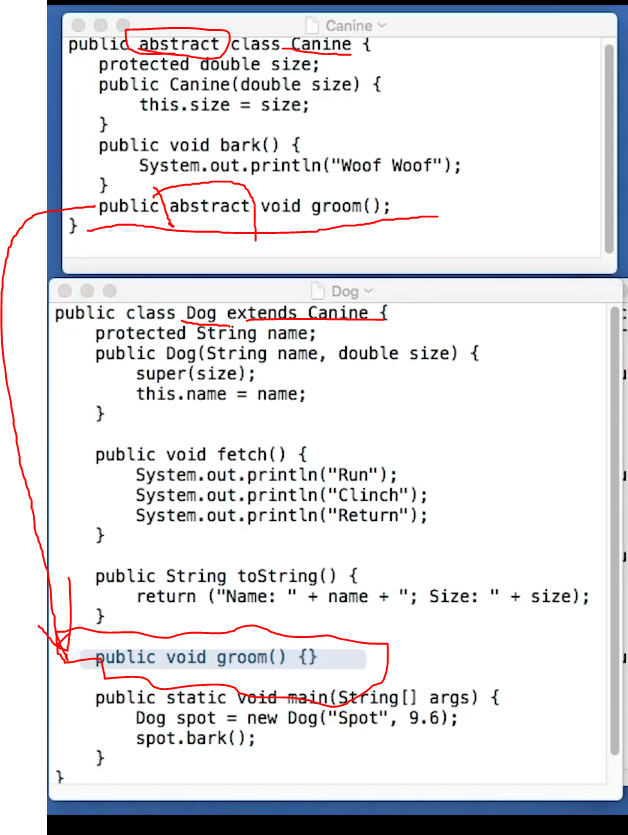

### 9. Let's override "Equals" methods in Object Class (superclass of all Java classes)

1). By default, Object Class is superclass of all Java classes. And Object Class has various methods, like .equals() method, which we will focus on today.

- For this .equals() method, it simply test if two objects are referring to the same heap(address), it will return true if so (i.e. the two objects are actually pointing to one object, and the two are just alias), and it will return false otherwise.

- Based on our previous conclusion (Module_2_L4), whenever "new" operator is used to create an object, it will create another memory location. So it the following example, even if the two "Dog3" objects have exactly the same attributes, they are still two objects, i.e. two different heaps. Thus the default .equals() method will return "false" as indicated below:

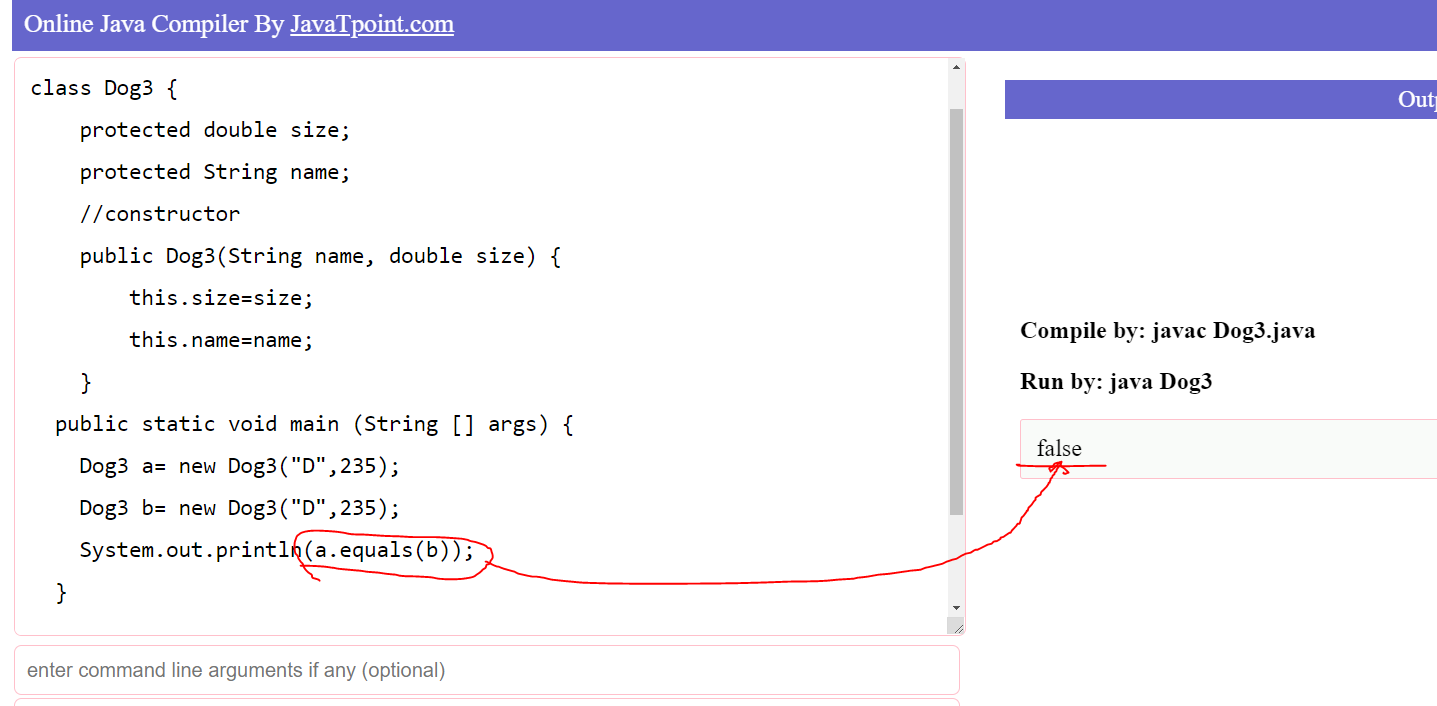


2). Today's lecture focuses on how to override the default method .equals() from Object superclass, so that we can detect if the size of the two Dog3 objects are the same, if they are the same, then return true regardless of other attributes.



- Here is the API docuemntation of the default .equals() method of Object class
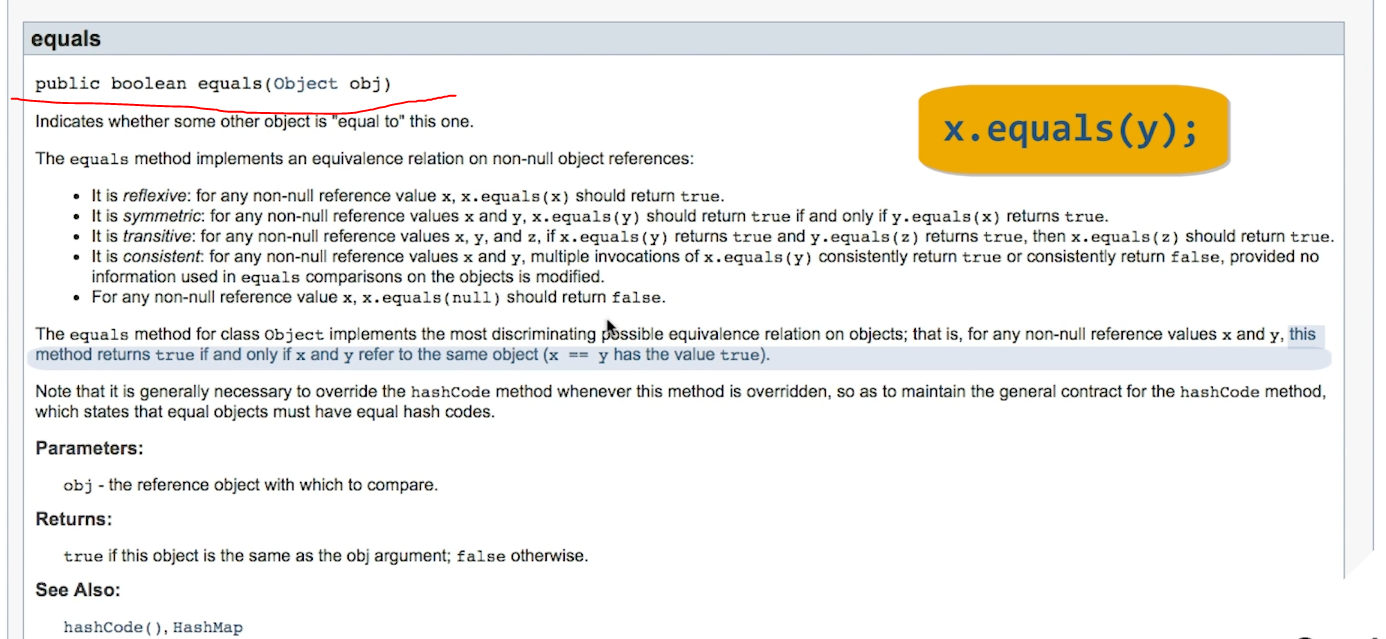

- First step to override this method is to use the same signature as in API docs above in our code below (see screenshot public boolean equals(Object o))
    - Please note: you can name o whatever name you want, just need to make sure its type is Object as defined in API doc.
- Second step is to check the input parameter, here it is o (which is Object type), to see if it is an instance of Dog3 object, using "instanceof" operator.
- Third step: once we confirmed o is the instance of Dog3 object which is what we want, we can then go ahead and compare if the size of the input object is the same as the size of the object that is invoking the method.
    - Note 1: doggy.size -> this size refers to Object o's size, in this case, b's size (see last line of code); 
    - Note 2: size -> this default size variable (RHS of the == sign) refers to size of the object that invokes the method, in this case, a's size (see last line of code) --> I guess it is the property of the default equals() method where you can use the variable name directly without referring to object a here.
    - Note 3: Before you do the size comparison, there is an extra step -> "Casting" (in screenshot below red highlight #2: Dog3 doggy = (Dog3) o;)
    Why? 
    > VIP: Object class can have instance that references any of the classes because Object is root of all classes, e.g. o is an instance of Object Class here, and it references Dog3 class.
    
    > When a reference does point to an object that is different from its type, things can get tricky. For example, o is of Object Type, but it points to an object which is "Dog3" type when passing b to .equals() method. 
    
    > The reason that's tricky is because the only methods can be invoked on Object type object (using that reference) are the ones declared in the references’ type. That rule means that regardless of what o is pointing to, it can only invoke these inherited methods of the "Object" class, not "Dog3" class, since its type is Object
    
    > Since .size is defined under Dog3() class, o.size will be illegal since o is Object type, not Dog3 type
    
    > To overcome this, we need to "cast" o from Object type to "Dog3" type (this is called "downcasting" because it is casting from superclass to subclass)
>    - For example, in screenshot below red highlight #2: Dog3 doggy = (Dog3) o; we create a new variable "doggy" with Dog3 type by casting o to Dog3 type.
>    - But please note: after this step, o is still Object type, the casting won't change the type of its operand to something else, it just create a new reference(variable)

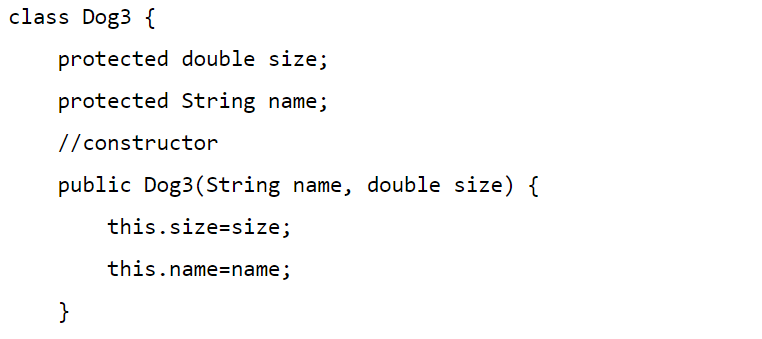
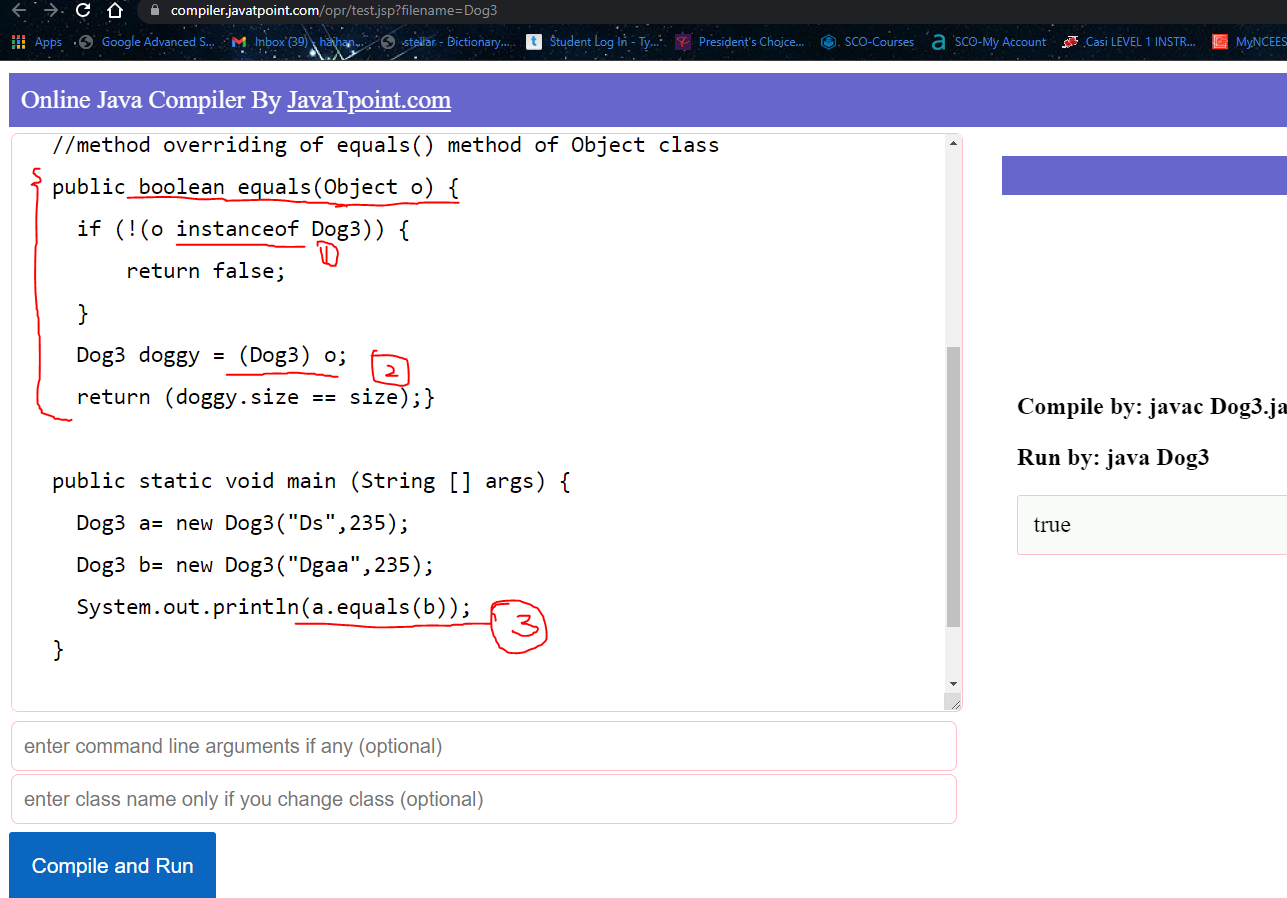